# Quality Control Example 
## using methpype and methQC and GSE69852 from the GEO database
#### Import modules

In [1]:
# add directory of function to path
import sys
sys.path.append("/Users/mmaxmeister/legx/methQC/")
sys.path.append("/Users/mmaxmeister/legx/methpype/") # even though methpype is pip installed, this is still necessary on my machine (MM)
import methpype
%matplotlib inline

In [2]:
# not a module yet.
import os
print(os.getcwd())
os.chdir('/Users/mmaxmeister/legx/methQC')
import methQC
dir(methQC)

/Users/mmaxmeister/legx/methQC/docs


['DNA_mAge_Hannum',
 'NullHandler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'beta_density_plot',
 'beta_mds_plot',
 'cli',
 'cumulative_sum_beta_distribution',
 'detect_array',
 'exclude_probes',
 'exclude_sex_control_probes',
 'filters',
 'getLogger',
 'list_problem_probes',
 'mean_beta_compare',
 'mean_beta_plot',
 'postprocessQC']

## Importing methpype data

In [5]:
# print(help(methpype.run_pipeline))
# data_dir = "/Users/mmaxmeister/legx/methpype/docs/example_data/GSE69852"

# SAMPLE DATA
# obtain and gunzip raw data from https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE100850&format=file first.
# ABOUT GSE100850: Epigenetic alterations detected in the genome of very young breast cancer patients:
#    identification of new biomarkers 

### using methpype, you would generate a sample output file called "beta_values.pkl" this way:
#data_dir = "/Users/mmaxmeister/GSE100850_RAW"
#df = methpype.run_pipeline(data_dir, betas=True) # makes df into a betas sheet. (the consolidate function within it)

#In this example, we've already done that. So just load the data from disk, like this:
import pandas as pd
df = pd.read_pickle("docs/example_data/beta_values.pkl")

## Filtering functions

In [6]:
# command line autodetects array type. Use this to get it / confirm it.
print(methQC.detect_array(df))
df.shape

EPIC


(865859, 39)

In [7]:
df = methQC.exclude_sex_control_probes(df, 'EPIC', verbose=True)
df.shape

Array EPIC: Removed 19627 sex linked probes and 695 internal control probes from 39 samples. 846232 probes remaining.
Discrepancy between number of probes to exclude (20322) and number actually removed (19627): 695
It appears that your sample had no control probes, or that the control probe names didn't match the manifest (EPIC).


(846232, 39)

In [8]:
#print(help(methQC.list_problem_probes))
# if you pass in '450k' or 'EPIC' you'll get different types of filtering. 
sketchy_probes = methQC.list_problem_probes('EPIC')
filtered = methQC.filters.exclude_probes(df, sketchy_probes)

Of 846232 probes, 381361 matched, yielding 464871 probes after filtering.


## QC plots

39


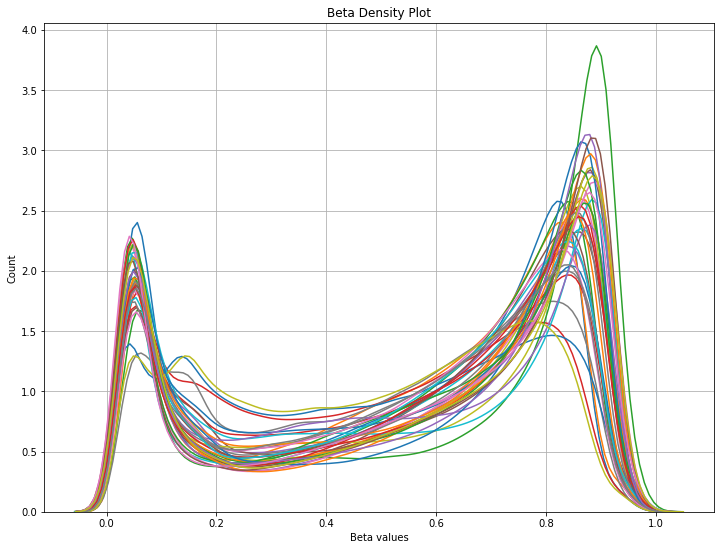

In [9]:
# Shows probe beta values for each sample as a separate trace.
methQC.beta_density_plot(df)

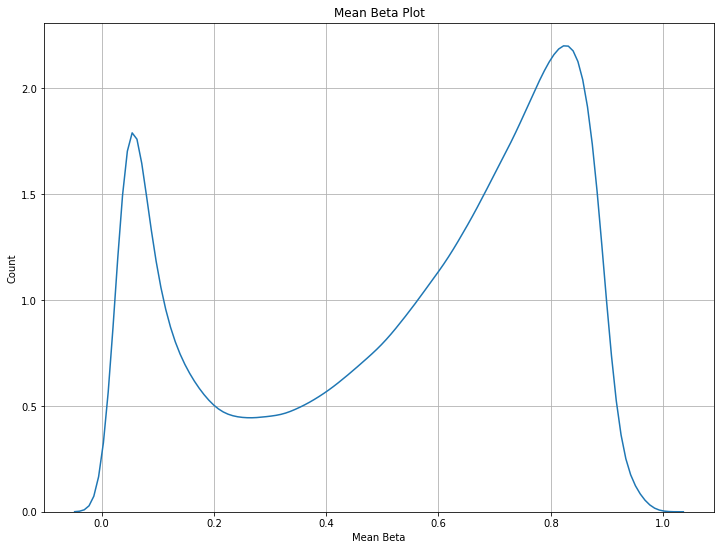

In [10]:
# This shows all samples as a single trace.
methQC.mean_beta_plot(df)

## Visual filtering functions
### (These return a filtered data set)

Your data needed to be transposed (df = df.transpose()).
(39, 846232)
Making sure that probes are in columns (the second number should be larger than the first).
Starting MDS fit_transform. this may take a while.
You can now remove outliers based on their transformed beta values
 falling outside a range, defined by the sample standard deviation.
Your acceptable value range: x=(-100.0 to 100.0), y=(-93.0 to 93.0).


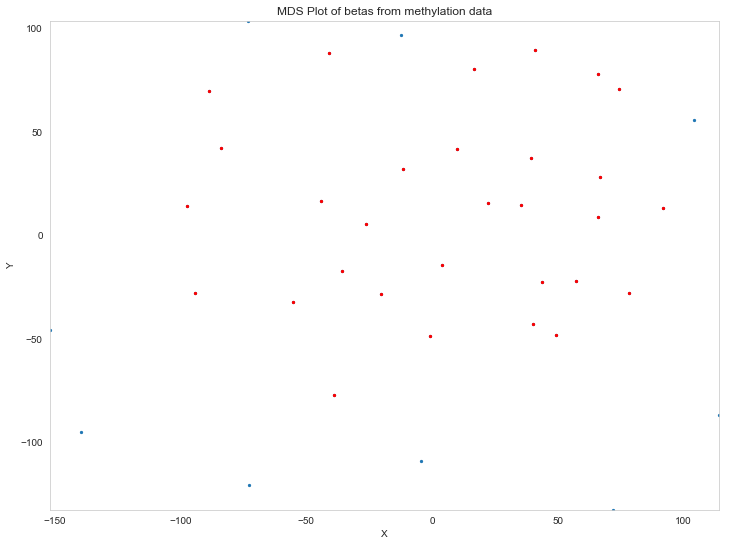

Original samples (39, 2) vs filtered (30, 2)
Your scale factor was: 1.5
Enter new scale factor, <enter> to accept and save:


In [10]:
# MDS filtering -- you can exclude outlier samples based on falling outside 
# some standard deviation cutoff from the center of a 2D plot.
# This is an interactive function.
mds_filtered, mds_excluded = methQC.beta_mds_plot(df)

1it [00:00,  6.06it/s]

Calculating area under curve for each sample.


30it [00:03,  7.16it/s]


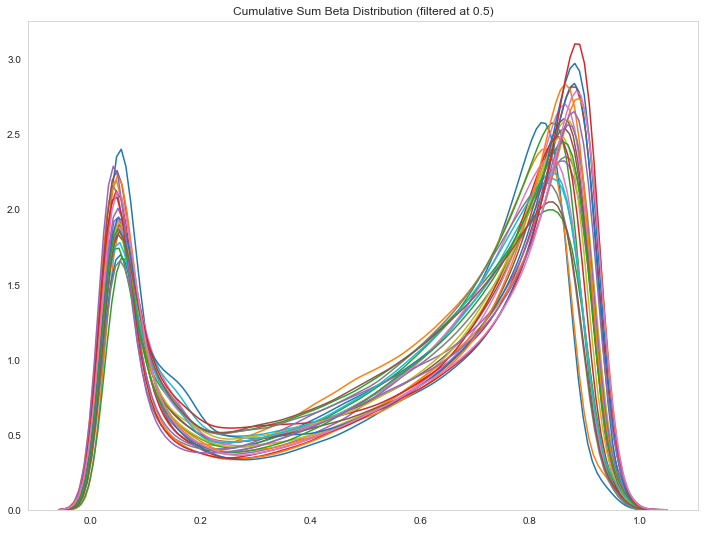

In [18]:
# adjust the cutoff value to exclude outliers. Default is 0.7.
df_outliers_removed = methQC.cumulative_sum_beta_distribution(mds_filtered, cutoff=0.5)

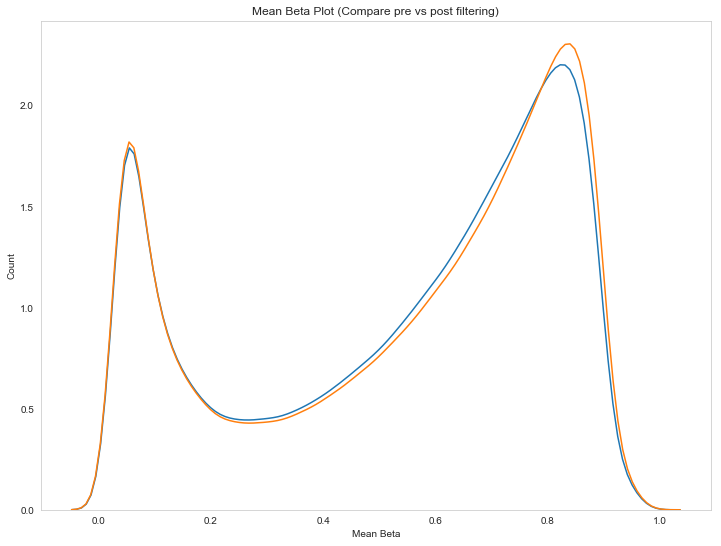

In [19]:
# effect of MDS filtering
methQC.mean_beta_compare(df, mds_filtered)

Your data needed to be transposed (df = df.transpose()).


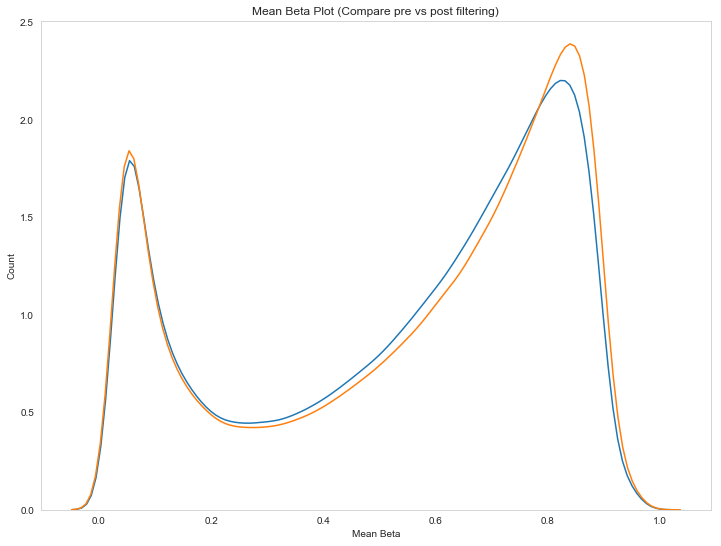

In [20]:
# effect of cumulative sum filtering
methQC.mean_beta_compare(df, df_outliers_removed, verbose=True)